In [1]:
import torch
from torch.autograd import Variable
from torch.nn import Linear
from torch.nn.functional import smooth_l1_loss

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
boston = load_boston()
X = boston.data
y = boston.target
X.shape, y.shape

((506, 13), (506,))

In [3]:
# !!!
y = y.reshape(-1,1)
y.shape

(506, 1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# some housekeeping
input_dim = X_train.shape[1]
output_dim = 1 # for regression

# store cost during optimization
train_costs = [[], []] 
# 
print_step = 50

### Hyperparameters

In [7]:
learning_rate = 0.5
num_epochs = 100

### Variables

In [8]:
dtype = torch.FloatTensor

X_train = Variable(torch.from_numpy(X_train).type(dtype))
X_test = Variable(torch.from_numpy(X_test).type(dtype))
y_train = Variable(torch.from_numpy(y_train).type(dtype))
y_test = Variable(torch.from_numpy(y_test).type(dtype))

### Define the model

In [9]:
# Linear(in_features, out_features, bias=True)
# Applies a linear transformation to the incoming data: :math:`y = Ax + b`
# in_features: size of each input sample
# out_features: size of each output sample
# bias: If set to False, the layer will not learn an additive bias. Default: True

model = Linear(input_dim, output_dim)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### Fit the model

In [10]:
for epoch in range(num_epochs):
   
  # Forward pass
  y_pred = model(X_train)
  loss_var = loss_fn(y_pred, y_train)
  loss = loss_var.data[0]
                           
  train_costs[0].append(epoch)
  train_costs[1].append(loss)
  if epoch % print_step == 0:
    print("Epoch:", '%04d' % (epoch), "loss =", "{:.4f}".format(loss))
  
  # zero the gradients
  optimizer.zero_grad()

  # Backward pass
  loss_var.backward()

  # Calling the step function on an Optimizer makes an update to its parameters
  optimizer.step()
  

Epoch: 0000 loss = 597.4117
Epoch: 0050 loss = 27.6969


In [11]:
train_score = loss_fn(model(X_train), y_train).data[0]
test_score = loss_fn(model(X_test), y_test).data[0]

print("\n\nTraining cost: ", "{:.4f}".format(train_score))
print("\nTest cost: ", "{:.4f}".format(test_score))



Training cost:  19.3862

Test cost:  33.3771


### get model weights

In [12]:
model.weight.data



Columns 0 to 9 
-0.9448  1.0565  0.0395  0.5866 -1.8368  2.5698 -0.0817 -2.8716  2.0897 -1.8599

Columns 10 to 12 
-2.3016  0.7329 -3.5887
[torch.FloatTensor of size 1x13]

In [13]:
model.bias.data


 22.8467
[torch.FloatTensor of size 1]

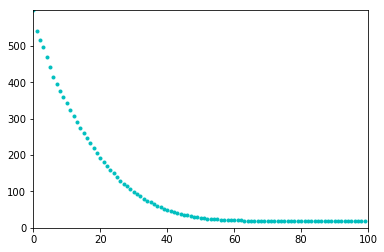

In [14]:
plt.plot(train_costs[0], train_costs[1], 'c.')
plt.axis([0, num_epochs, 0, max(train_costs[1])])
plt.show()   

### Get predictions

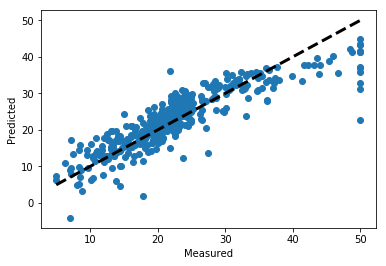

In [15]:
pred_train = model(X_train).data.numpy()
y_train_numpy = y_train.data.numpy()
fig, ax = plt.subplots()
ax.scatter(y_train_numpy, pred_train)
ax.plot([y_train_numpy.min(), y_train_numpy.max()], [y_train_numpy.min(), y_train_numpy.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

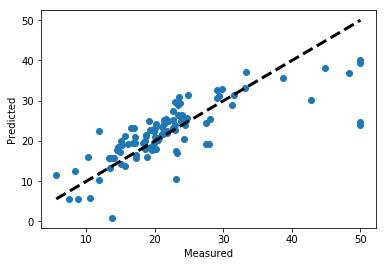

In [16]:
pred_test = model(X_test).data.numpy()
y_test_numpy = y_test.data.numpy()
fig, ax = plt.subplots()
ax.scatter(y_test_numpy, pred_test)
ax.plot([y_test_numpy.min(), y_test_numpy.max()], [y_test_numpy.min(), y_test_numpy.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()